In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt

# Exercise 1 

In [2]:
S = np.array([100 , 50 , 25])
Q = np.array([1 , 3 , 5])
sig = np.log(S)
delta_sig_sd = np.array([1 , 2 , 3]) * 10**-3
N = 10**4
alpha = np.arange(.9,1,.01)

In [3]:
col_names = ['t3_1' , 't10_1' , 't50_1' , 'norm_1' , 't3_2' , 't10_2' , 't50_2' , 'norm_2' ,'t3_3' , 't10_3' , 't50_3' , 'norm_3']
df = pd.DataFrame(columns = col_names , index = range(N))
DoF = np.array([3 , 10 , 50])
for i in range(len(S)):
    scale_par = np.sqrt(DoF / (DoF - 2))/ delta_sig_sd[i]
    df[col_names[(i)*4]] = np.random.standard_t(DoF[0],N) / scale_par[0]
    df[col_names[(i)*4 +1]] = np.random.standard_t(DoF[1],N) / scale_par[1]
    df[col_names[(i)*4 +2]] = np.random.standard_t(DoF[2],N) / scale_par[2]
    df[col_names[(i)*4 +3]] = np.random.normal(0,delta_sig_sd[i],N)

In [4]:
col_names2 = ['t3' , 't10' , 't50' , 'norm']
df2 = pd.DataFrame(columns = col_names2 , index = range(N))
df2['t3'] = -(S * Q * (np.exp(df[['t3_1','t3_2','t3_3']]) - 1)).sum(axis = 1)
df2['t10'] = -(S * Q*(np.exp(df[['t10_1','t10_2','t10_3']]) - 1)).sum(axis = 1)
df2['t50'] = -(S * Q*(np.exp(df[['t50_1','t50_2','t50_3']]) - 1)).sum(axis = 1)
df2['norm'] = -(S * Q*(np.exp(df[['norm_1','norm_2','norm_3']]) - 1)).sum(axis = 1)

In [5]:
df2

,t3,t10,t50,norm
0,0.911191,0.314993,0.776305,-0.472226
1,0.061384,-0.148783,-0.445322,0.374284
2,0.040824,0.091908,0.196083,-0.669733
3,-0.352125,-0.287116,-0.103196,-0.376777
4,0.514142,0.424670,-0.182441,0.583193
...,...,...,...,...
9995,-0.706267,1.011115,-0.673325,-0.508916
9996,0.217687,-0.419483,0.633358,0.532454
9997,-0.173270,0.681698,0.591533,-0.091696
9998,0.760793,0.135042,0.594547,-0.082596


In [6]:
df2.quantile(alpha)

,t3,t10,t50,norm
0.90,0.502059,0.594705,0.620627,0.637345
0.91,0.531440,0.625773,0.649099,0.667323
0.92,0.566461,0.660457,0.680752,0.695948
0.93,0.602299,0.692509,0.718879,0.732331
0.94,0.645653,0.735445,0.753640,0.772068
0.95,0.698187,0.784473,0.793129,0.809305
0.96,0.760686,0.853577,0.853052,0.867344
0.97,0.858089,0.922974,0.918072,0.932555
0.98,0.993967,1.018249,1.010764,1.006069
0.99,1.281378,1.149354,1.111286,1.134843


In [7]:
df2.quantile(alpha) - df2.mean()

,t3,t10,t50,norm
0.90,0.500285,0.603726,0.621662,0.636216
0.91,0.529666,0.634793,0.650134,0.666194
0.92,0.564687,0.669477,0.681787,0.694819
0.93,0.600525,0.701529,0.719914,0.731202
0.94,0.643879,0.744465,0.754676,0.770939
0.95,0.696412,0.793494,0.794164,0.808176
0.96,0.758912,0.862597,0.854088,0.866215
0.97,0.856315,0.931994,0.919107,0.931426
0.98,0.992192,1.027269,1.011800,1.004940
0.99,1.279603,1.158374,1.112321,1.133714


In [8]:
df_VaR = pd.DataFrame(columns = col_names2,index = alpha)
for i in range(len(alpha)):
    for j in range(len(col_names2)):
        #df_inter = df2[col_names2[j]].sort_values(ascending = False)[:int(round(N * (alpha[i])))]
        #df_inter = df2.sort_values()[:int(round((N*(1-alpha[i]))))]
        df_VaR.at[alpha[i],col_names2[j]] = df2[col_names2[j]].sort_values(ascending = False)[:int(round(N * (1 - alpha[i])))].mean()
df_VaR

,t3,t10,t50,norm
0.90,0.836826,0.852866,0.85408,0.866007
0.91,0.872615,0.879935,0.878316,0.889884
0.92,0.913045,0.909569,0.905129,0.915961
0.93,0.960175,0.942737,0.933849,0.944911
0.94,1.01599,0.980975,0.966941,0.977029
0.95,1.085,1.02558,1.00624,1.01407
0.96,1.17353,1.07744,1.05282,1.05904
0.97,1.29398,1.14034,1.10844,1.112
0.98,1.47937,1.22695,1.1799,1.18201
0.99,1.84503,1.37629,1.30409,1.30144


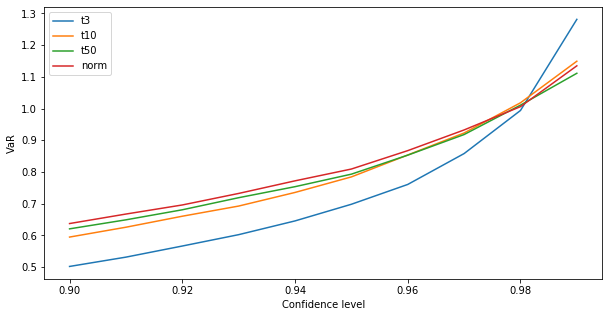

In [9]:
#Plot VaR
plt.figure(figsize = (10,5))
plt.plot(df2.quantile(alpha))
plt.xlabel('Confidence level')
plt.ylabel('VaR')
plt.legend(df2.columns)

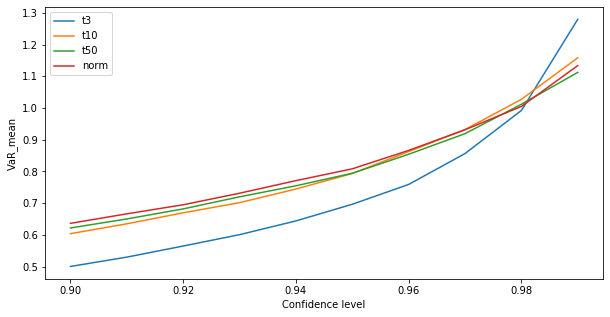

In [10]:
#Plot VaR mean
plt.figure(figsize = (10,5))
plt.plot(df2.quantile(alpha) - df2.mean())
plt.xlabel('Confidence level')
plt.ylabel('VaR_mean')
plt.legend(df2.columns)

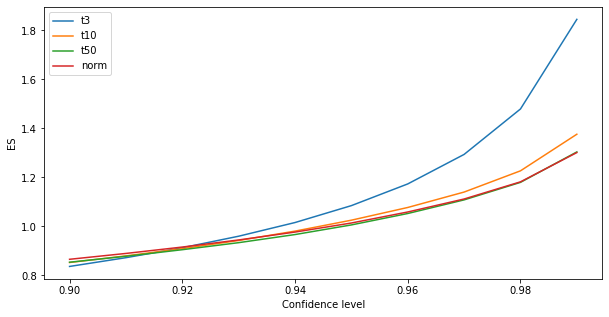

In [11]:
#Plot ES
plt.figure(figsize = (10,5))
plt.plot(df_VaR)
plt.xlabel('Confidence level')
plt.ylabel('ES')
plt.legend(df_VaR)

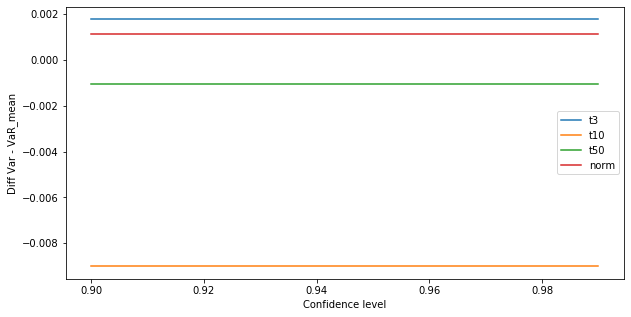

In [12]:
#Plot diff VaR and Var_mean
plt.figure(figsize = (10,5))
plt.plot(df2.quantile(alpha) - (df2.quantile(alpha) - df2.mean()))
plt.xlabel('Confidence level')
plt.ylabel('Diff Var - VaR_mean')
plt.legend(df2.columns)

# Exercise 2

In [13]:
#Set parameters
T = 0.5
r = 0.05
sig = 0.2
S = 100
K = 100
dt = 1/252
q = 0

In [14]:
alpha = np.array([0.95,0.99])
cov = np.array([[10**-6, -0.5 * 10**-7],[-0.5 * 10**-7, 10**-8]])
df = pd.DataFrame(np.random.multivariate_normal([0,0],cov,10**4),columns = ['X_1' , 'X_3'])

In [15]:
def European_Call (S,K,T,q,r,sig):
    d1 = (np.log(S/K) + (r - q + sig**2/2) * T)/(sig * np.sqrt(T))
    d2 = d1 - sig * np.sqrt(T)
    return S * np.exp(-q * T) * stats.norm.cdf(d1) - K * np.exp(-r * T) * stats.norm.cdf(d2)

def Theta(S,K,q,r,sig,delta):
    d1 = (np.log(S/K) + (r - q + sig**2 /2) * delta) / (sig * np.sqrt(delta))
    d2 = d1 - sig * np.sqrt(delta)
    return - np.exp(- q * delta) * S * stats.norm.pdf(d1) * sig / ( 2 * np.sqrt(delta)) - r * K * np.exp(- r * delta) * stats.norm.cdf(d2) + q * S * np.exp(-q * delta) * stats.norm.cdf(d1)

def Delta(S,K,q,r,sig,delta):
    d1 = (np.log(S/K) + (r - q + sig**2 /2) * delta) / (sig * np.sqrt(delta))
    return np.exp(-q*delta) * stats.norm.cdf(d1)

def Vega(S,K,q,r,sig,delta):
    d1 = (np.log(S/K) + (r - q + sig**2 /2) * delta) / (sig * np.sqrt(delta))
    return S * np.exp(-q * delta) * stats.norm.pdf(d1) * np.sqrt(delta)




In [16]:
C0 = European_Call(S,K,T,q,r,sig)
df_real = pd.DataFrame(columns = ['Price' , 'Sig'])
df_real.Price = S * np.exp(df.X_1)
df_real.Sig = sig + df.X_3

In [17]:
Val = pd.DataFrame(columns = ['Monte_Carlo' , 'Lin_Loss'])

In [18]:
Val.Monte_Carlo = C0 - European_Call(df_real.Price, K , T , q , r , df_real.Sig) - S + df_real.Price

In [19]:
Val.Lin_Loss = - (Theta(S,K,q,r,sig,T) * dt + df.X_1 * S *(1 + Delta(S,K,q,r,sig,T)) + df.X_3 * Vega(S,K,q,r,sig,T))

In [20]:
VaR = pd.DataFrame(index = ['Monte_Carlo' , 'Lin_Loss' , 'VarCovar'],columns = ['VaR_0.05','VaR_mean_0.05','ES_0.05','VaR_0.01','VaR_mean_0.01','ES_0.01'])

In [21]:
VaR.loc['Monte_Carlo'][0] = Val.Monte_Carlo.quantile(1 - alpha[0])
VaR.loc['Monte_Carlo'][1] = VaR.loc['Monte_Carlo'][0] - Val.Monte_Carlo.mean()
VaR.loc['Monte_Carlo'][2] = Val.Monte_Carlo.sort_values()[:int(round(N * (1 - alpha[0])))].mean()
VaR.loc['Monte_Carlo'][3] = Val.Monte_Carlo.quantile(1 - alpha[1])
VaR.loc['Monte_Carlo'][4] = VaR.loc['Monte_Carlo'][3] - Val.Monte_Carlo.mean()
VaR.loc['Monte_Carlo'][5] = Val.Monte_Carlo.sort_values()[:int(round(N * (1 - alpha[1])))].mean()

In [22]:
VaR.loc['Lin_Loss'][0] = Val.Lin_Loss.quantile(1 - alpha[0])
VaR.loc['Lin_Loss'][1] = VaR.loc['Lin_Loss'][0] - Val.Lin_Loss.mean()
VaR.loc['Lin_Loss'][2] = Val.Lin_Loss.sort_values()[:int(round(N * (1 - alpha[0])))].mean()
VaR.loc['Lin_Loss'][3] = Val.Lin_Loss.quantile(1 - alpha[1])
VaR.loc['Lin_Loss'][4] = VaR.loc['Lin_Loss'][3] - Val.Lin_Loss.mean()
VaR.loc['Lin_Loss'][5] = Val.Lin_Loss.sort_values()[:int(round(N * (1 - alpha[1])))].mean()

In [23]:
B = np.array([ (Delta(S,K,q,r,sig,T) + 1) * S , Vega(S,K,q,r,sig,T)])
VaR.loc['VarCovar'][0] = - Theta(S,K,q,r,sig,T) * dt + np.sqrt(np.matmul(B.transpose(),np.matmul(B,cov))) * stats.norm.ppf(1 - alpha[0])
VaR.loc['VarCovar'][1] = VaR.loc['VarCovar'][0]
VaR.loc['VarCovar'][2] = - Theta(S,K,q,r,sig,T) * dt + np.sqrt(np.matmul(B.transpose(),np.matmul(B,cov))) * stats.norm.pdf(stats.norm.ppf(1 - alpha[0]))/alpha[0]
VaR.loc['VarCovar'][3] = - Theta(S,K,q,r,sig,T) * dt + np.sqrt(np.matmul(B.transpose(),np.matmul(B,cov))) * stats.norm.ppf(1 - alpha[1])
VaR.loc['VarCovar'][4] = VaR.loc['VarCovar'][3]
VaR.loc['VarCovar'][5] = - Theta(S,K,q,r,sig,T) * dt + np.sqrt(np.matmul(B.transpose(),np.matmul(B,cov))) * stats.norm.pdf(stats.norm.ppf(1 - alpha[1]))/alpha[1]

In [24]:
VaR

,VaR_0.05,VaR_mean_0.05,ES_0.05,VaR_0.01,VaR_mean_0.01,ES_0.01
Monte_Carlo,-0.0686048,-0.0689248,-0.0862567,-0.0977952,-0.0981152,-0.112361
Lin_Loss,-0.227941,-0.258499,-0.289419,-0.331039,-0.361596,-0.375782
VarCovar,-0.228377,-0.228377,0.0494053,-0.336341,-0.336341,0.0364712
